In [1]:
import numpy as np

In [3]:
import pandas as pd

In [5]:
file=pd.read_csv("C:\\Users\\91755\\Desktop\\Excelr Assignments\\Basic stats - 1\\Basic stats - 1\\sales_data_with_discounts.csv")
file

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


In [7]:
#numerical columns in the dataset.
numerical_cols = file.select_dtypes(include='number').columns
numerical_cols

Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')

In [9]:
file.describe()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


In [11]:
#mean, median, mode, and standard deviation for these columns.
descriptive_stats = file[numerical_cols].describe()
descriptive_stats['mode'] = file[numerical_cols].mode().iloc[0]
descriptive_stats['median'] = file[numerical_cols].median()
print(descriptive_stats)

           Volume     Avg Price  Total Sales Value  Discount Rate (%)  \
count  450.000000    450.000000         450.000000         450.000000   
mean     5.066667  10453.433333       33812.835556          15.155242   
std      4.231602  18079.904840       50535.074173           4.220602   
min      1.000000    290.000000         400.000000           5.007822   
25%      3.000000    465.000000        2700.000000          13.965063   
50%      4.000000   1450.000000        5700.000000          16.577766   
75%      6.000000  10100.000000       53200.000000          18.114718   
max     31.000000  60100.000000      196400.000000          19.992407   

       Discount Amount  Net Sales Value  mode  median  
count       450.000000       450.000000   NaN     NaN  
mean       3346.499424     30466.336131   NaN     NaN  
std        4509.902963     46358.656624   NaN     NaN  
min          69.177942       326.974801   NaN     NaN  
25%         460.459304      2202.208645   NaN     NaN  
50%   

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

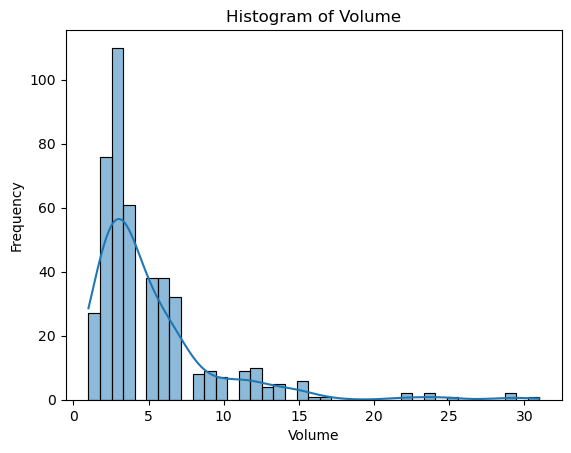

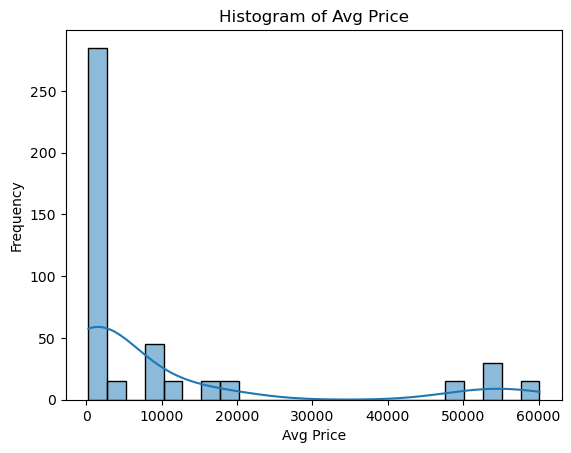

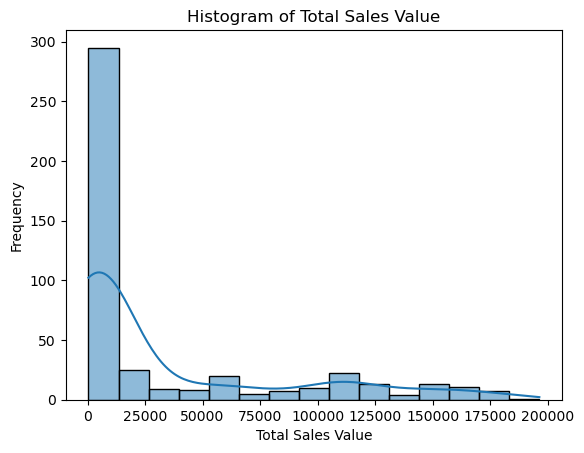

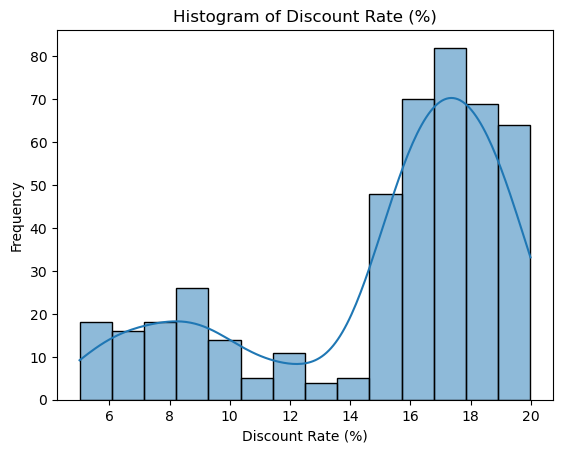

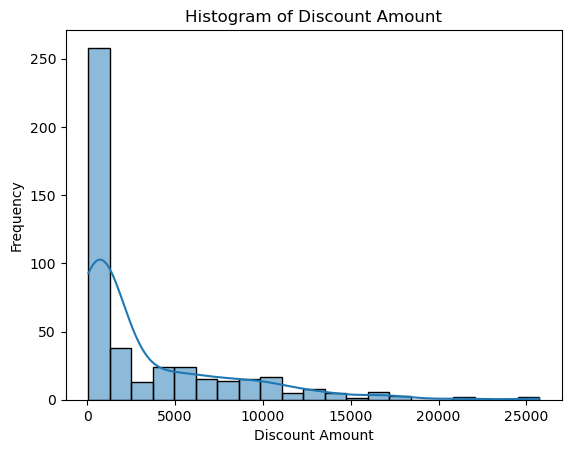

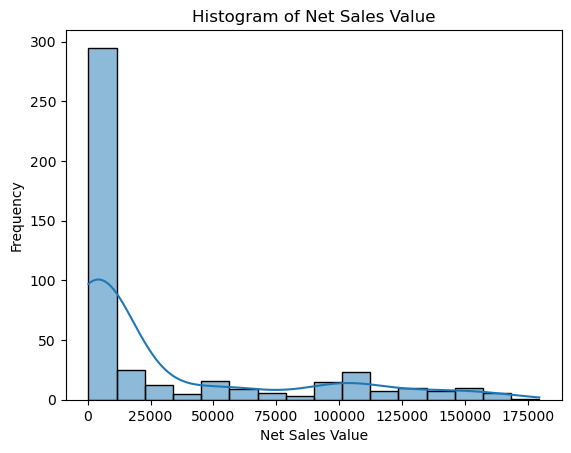

In [14]:
# Histograms for numerical columns
for col in numerical_cols:
    plt.figure()
    sns.histplot(file[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

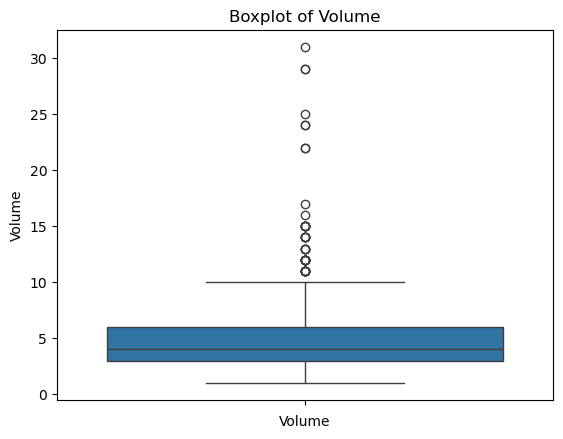

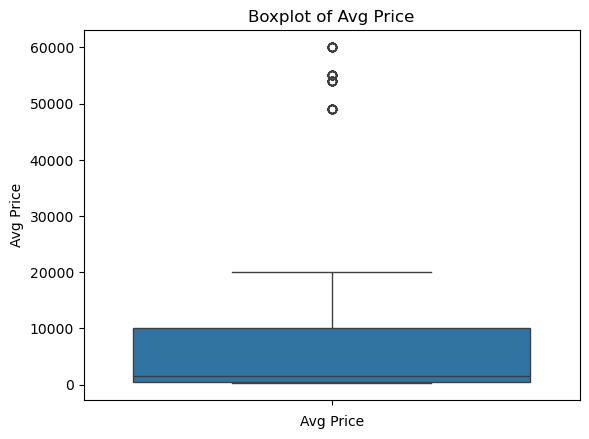

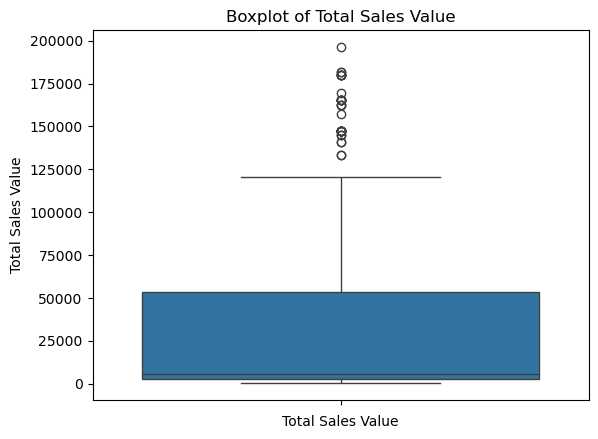

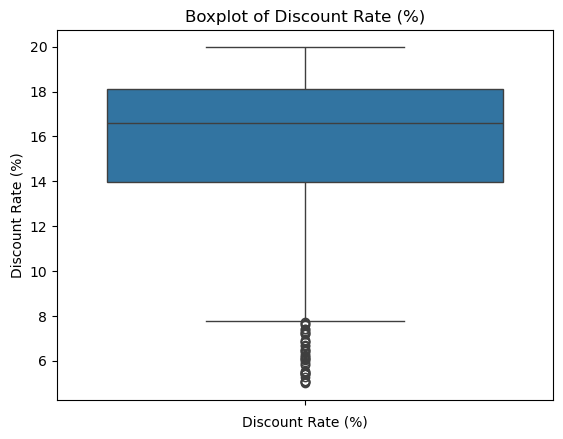

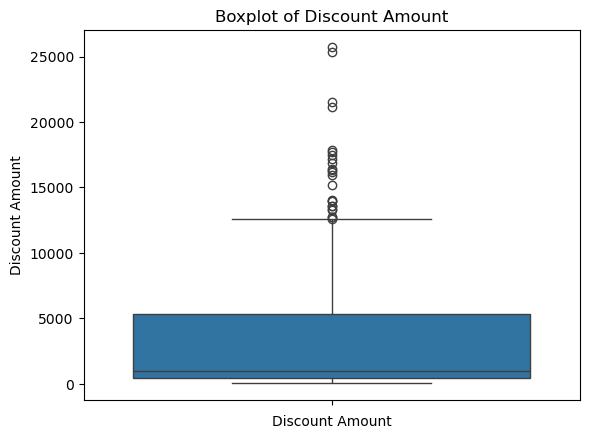

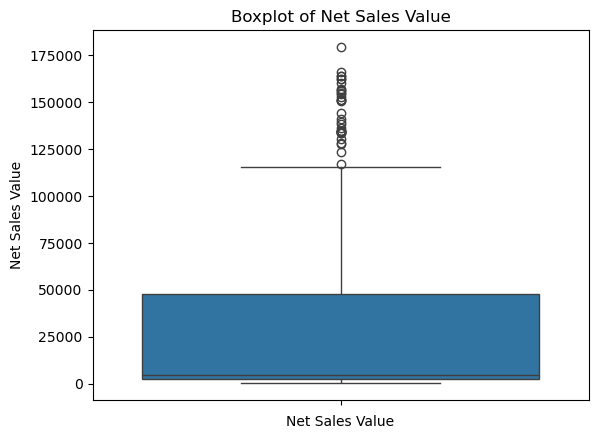

In [64]:
# Boxplots for numerical columns
for col in numerical_cols:
    plt.figure()
    sns.boxplot(file[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

In [66]:
categorical_cols = file.select_dtypes(include='object').columns
categorical_cols

Index(['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model'], dtype='object')

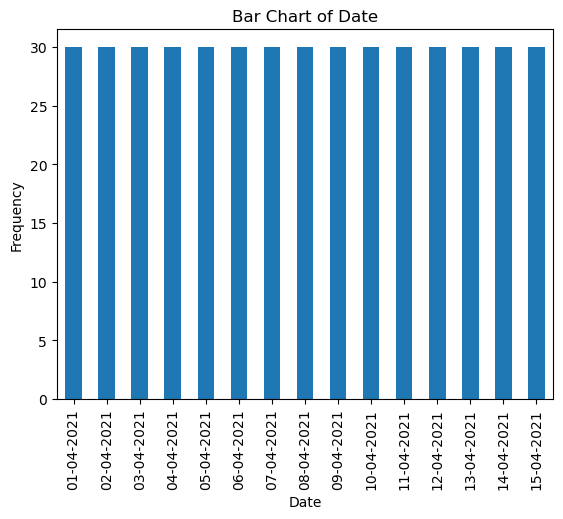

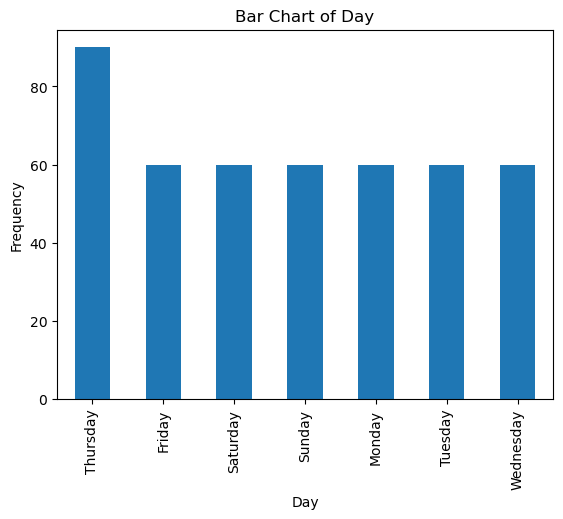

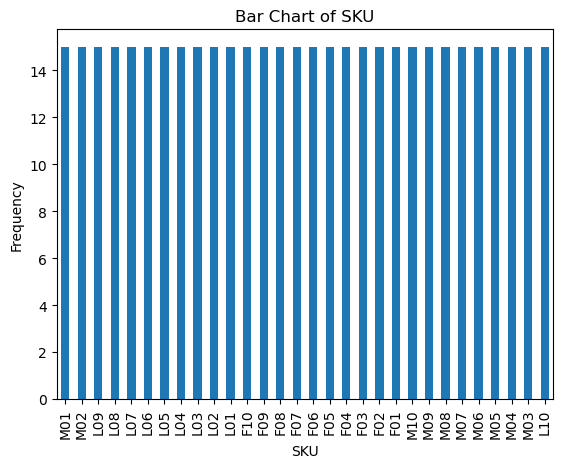

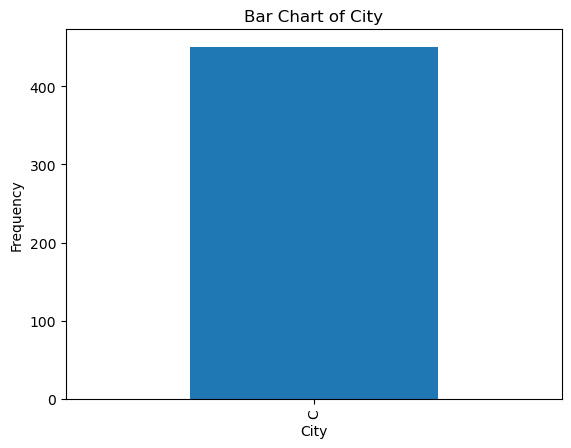

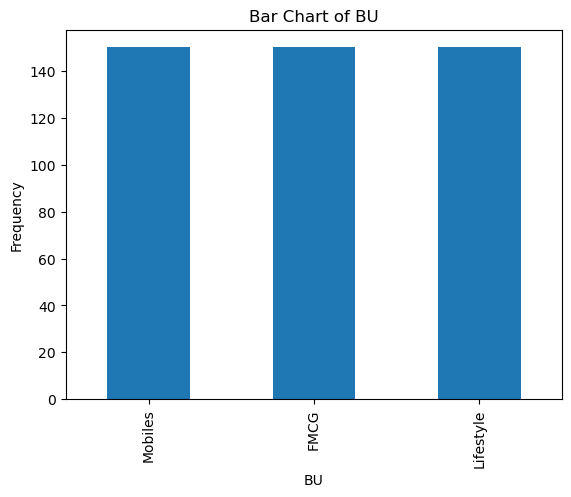

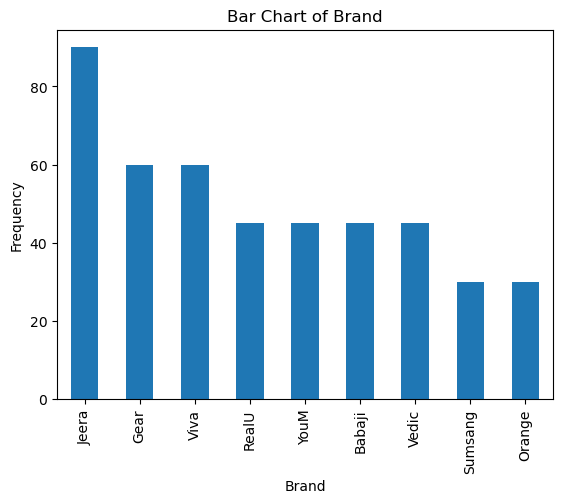

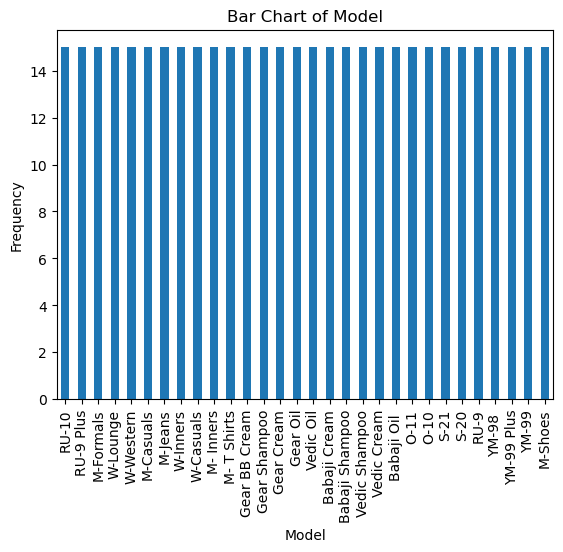

In [70]:
# Bar charts for categorical columns
for col in categorical_cols:
    plt.figure()
    file[col].value_counts().plot(kind='bar')
    plt.title(f'Bar Chart of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

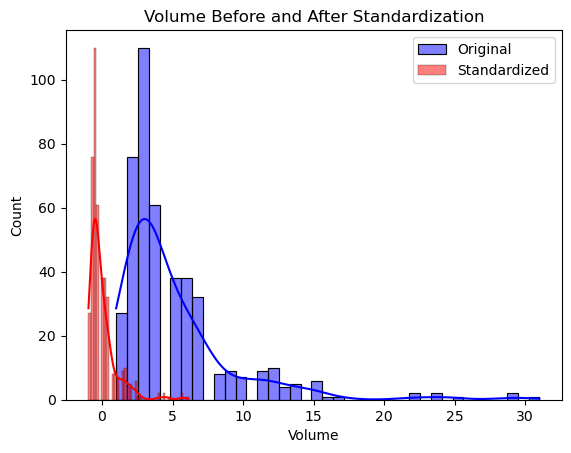

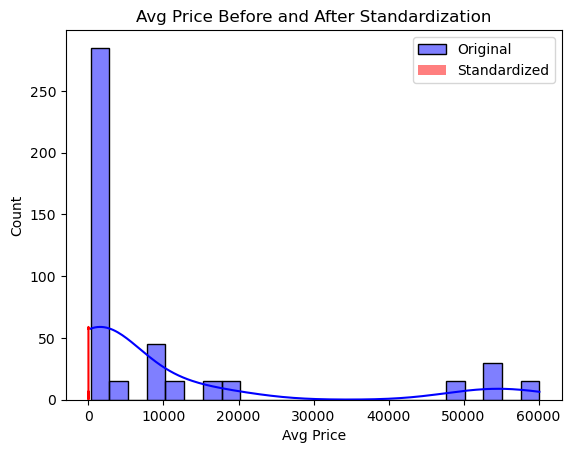

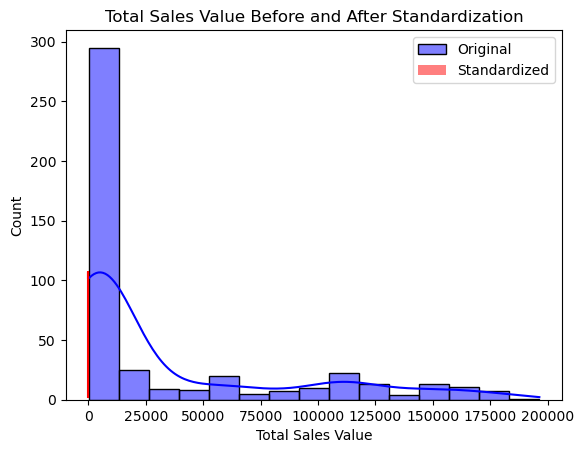

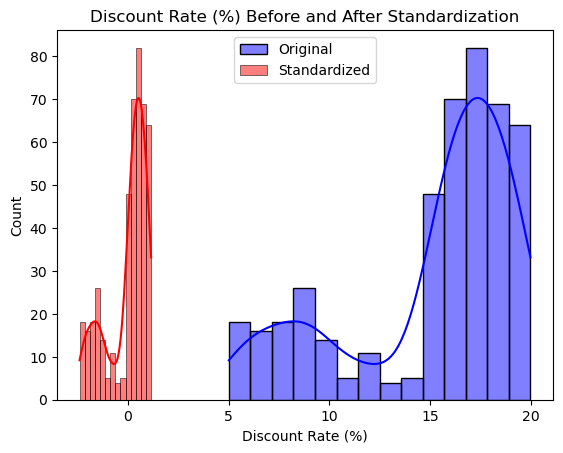

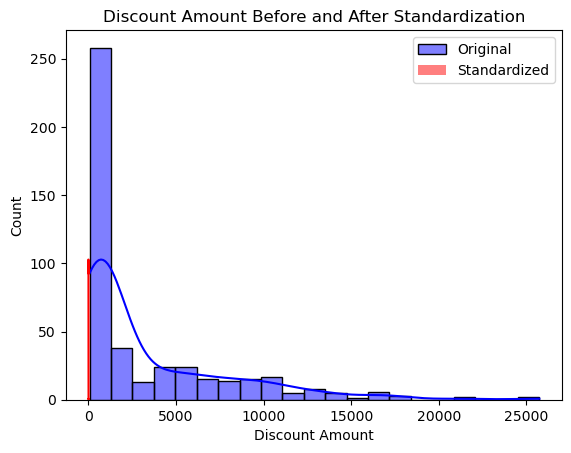

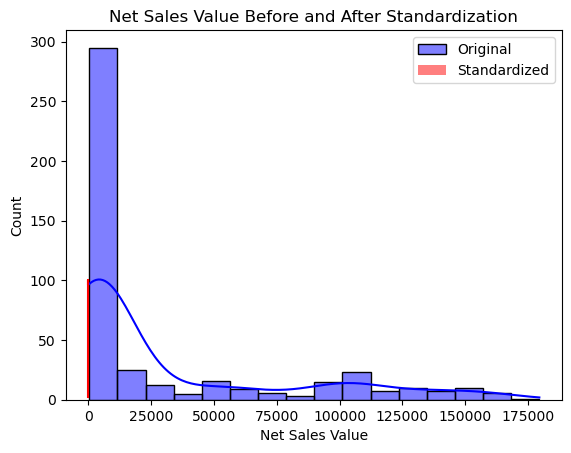

In [17]:
#Standardization of Numerical Variables
from sklearn.preprocessing import StandardScaler

# Standardize numerical columns
model = StandardScaler()
file_standardized = file.copy()
file_standardized[numerical_cols] = model.fit_transform(file[numerical_cols])

# Before and after comparison
for col in numerical_cols:
    plt.figure()
    sns.histplot(file[col], color='blue', label='Original', kde=True)
    sns.histplot(file_standardized[col], color='red', label='Standardized', kde=True)
    plt.title(f'{col} Before and After Standardization')
    plt.legend()
    plt.show()

In [21]:
# Conversion of Categorical Data into Dummy Variables
categorical_cols = file.select_dtypes(include=['object', 'category']).columns
print("\nCategorical Columns:", list(categorical_cols))


Categorical Columns: ['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model']


In [23]:
file_encoded = pd.get_dummies(file, columns=categorical_cols, drop_first=True)

# Display a portion of the transformed dataset
print("\nTransformed Dataset (First 5 Rows):\n", file_encoded.head())


Transformed Dataset (First 5 Rows):
    Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      15      12100             181500          11.654820     21153.498820   
1      10      10100             101000          11.560498     11676.102961   
2       7      16100             112700           9.456886     10657.910157   
3       6      20100             120600           6.935385      8364.074702   
4       3       8100              24300          17.995663      4372.946230   

   Net Sales Value  Date_02-04-2021  Date_03-04-2021  Date_04-04-2021  \
0    160346.501180            False            False            False   
1     89323.897039            False            False            False   
2    102042.089843            False            False            False   
3    112235.925298            False            False            False   
4     19927.053770            False            False            False   

   Date_05-04-2021  ...  Model_Vedic Cream  Mode

In [25]:
file_encoded.to_csv('encoded_sales_data.csv', index=False)
print("\nTransformed dataset saved as 'encoded_sales_data.csv'")


Transformed dataset saved as 'encoded_sales_data.csv'
